In [1]:
import gwpy
import bilby
import numpy as np
import pandas as pd

# code to convert time series to gwf using gwpy

In [27]:
data = gwpy.timeseries.TimeSeries.read('278/event_prec_H1_noiseydata.txt')

In [30]:
data.channel='H1:LDAS-STRAIN'

In [32]:
data.write('output.gwf')

In [34]:
gwpy.timeseries.TimeSeries.read('output.gwf','H1:LDAS-STRAIN')

<TimeSeries([ 2.94861153e-22,  6.21755451e-21,  7.09987010e-22,
             ..., -1.32830515e-21,  9.96606326e-22,
             -1.53945486e-22]
            unit=Unit(dimensionless),
            t0=<Quantity 1.24830141e+09 s>,
            dt=<Quantity 0.00048828 s>,
            name='H1:LDAS-STRAIN',
            channel=<Channel("H1:LDAS-STRAIN", 2048.0 Hz) at 0x7fdaa385eed0>)>

In [37]:
H1 = bilby.gw.detector.get_empty_interferometer('H1')


In [39]:
time_series=gwpy.timeseries.TimeSeries.read('output.gwf','H1:LDAS-STRAIN')
H1.set_strain_data_from_gwpy_timeseries(time_series=time_series)

# converting the asds to psd


In [5]:

asd_files={'H1':'/home1/srashti.goyal/joint_pe_far/PSDs/O3-H1-C01_CLEAN_SUB60HZ-1251752040.0_sensitivity_strain_asd.txt',\
           'L1':'/home1/srashti.goyal/joint_pe_far/PSDs/O3-L1-C01_CLEAN_SUB60HZ-1240573680.0_sensitivity_strain_asd.txt',\
           'V1':'/home1/srashti.goyal/joint_pe_far/PSDs/O3-Virgo_sensitivity_asd.txt'}

In [8]:
out_loc='/home1/srashti.goyal/joint_pe_far/PSDs/'

In [16]:
for det in asd_files.keys():
    asd=np.loadtxt(asd_files[det])
    psd=np.array([asd[:,0],asd[:,1]**2]).T
    np.savetxt(out_loc+det+'_psd.txt',psd,delimiter='\t')

# analysing the results

In [3]:

t199=bilby.result.read_in_result('/home/srashti.goyal/joint-pe-far/run_dir/cardiff_010121_GW19O727/199_298/outdir_199/result/199_data0_1248253165-8_analysis_H1L1V1_dynesty_result.json')

In [ ]:
t298=bilby.result.read_in_result('199_298_hanabi/outdir_298/result/298_data0_1248327464-3_analysis_H1L1V1_dynesty_result.json')

In [ ]:
t199.log_evidence,t298.log_evidence

In [8]:
t199.posterior.columns

Index(['chirp_mass', 'mass_ratio', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12',
       'phi_jl', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi',
       'phase', 'geocent_time', 'image_type', 'log_likelihood', 'log_prior'],
      dtype='object')

In [ ]:
t199.plot_corner(parameters=['chirp_mass','luminosity_distance','ra','dec','theta_jn','psi','phase'],save=False)

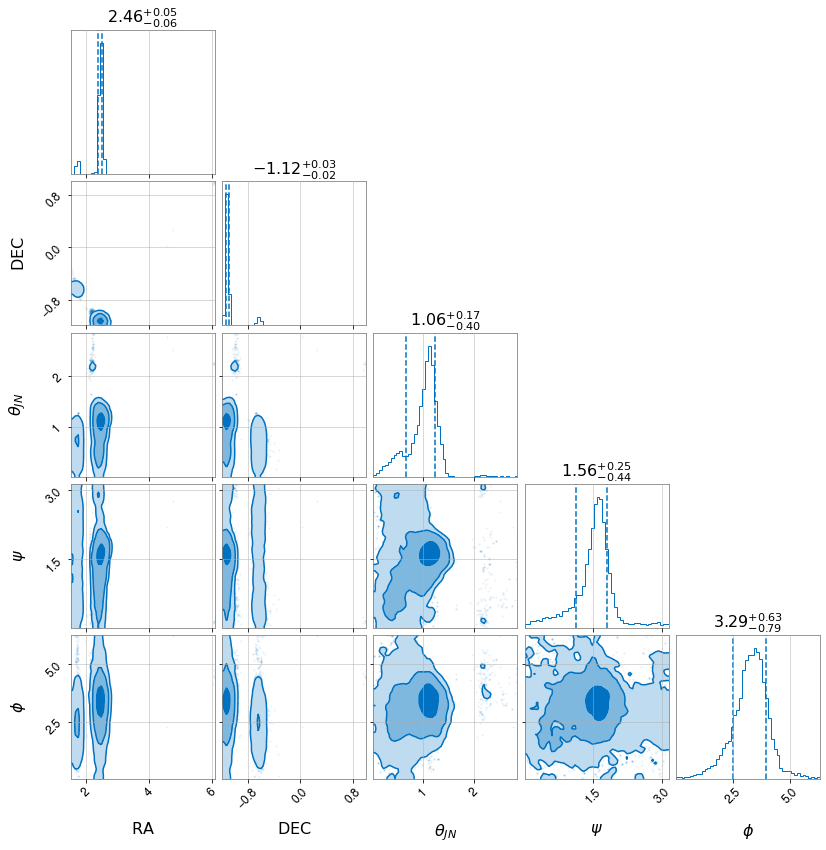

In [11]:
t298.plot_corner(parameters=['ra','dec','theta_jn','psi','phase'],save=False)

In [ ]:
joint=bilby.result.read_in_result('199_298_hanabi/outdir_joint_199_298/result/joint_199_298_hanabi_joint_analysis_result.json')

In [ ]:
joint.log_evidence

In [ ]:
logblu=joint.log_evidence-(t199.log_evidence+t298.log_evidence)

In [ ]:
logblu

In [2]:
from pycbc import conversions

In [3]:
m1= 52
m2= 30
conversions.mchirp_from_mass1_mass2(m1, m2)

34.128090403973516